## Computer Vision



In [20]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import cv2
import io
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
#importing the features in pandas dataframe and then convert them to a numpy array.
X = pd.read_csv("/Users/mohammedkhedr/Downloads/x_train_gr_smpl.csv")
X_array = X.to_numpy()

y = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl.csv")
y_array = y.to_numpy()

y0 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_0.csv")
y0_array = y0.to_numpy()

y1 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_1.csv")
y1_array = y1.to_numpy()

y2 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_2.csv")
y2_array = y2.to_numpy()

y3 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_3.csv")
y3_array = y3.to_numpy()

y4 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_4.csv")
y4_array = y4.to_numpy()

y5 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_5.csv")
y5_array = y5.to_numpy()

y6 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_6.csv")
y6_array = y6.to_numpy()

y7 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_7.csv")
y7_array = y7.to_numpy()

y8 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_8.csv")
y8_array = y8.to_numpy()

y9 = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_9.csv")
y9_array = y9.to_numpy()

Understanding the data:

In [5]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [6]:
y.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


## 1- Visualizing the data

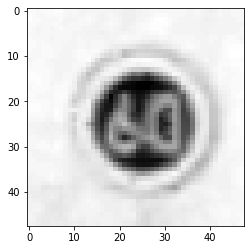

In [7]:
#Visualizing some pictures
index = 5500
some_feature = X.iloc[index].to_numpy()
some_image = some_feature.reshape(48, 48)
plt.imshow(some_image, cmap=mpl.cm.binary)
plt.show()

## 2- Randomization and Splitting:

Dividing the data into train set and test set.

In [22]:
#Randmoize and split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, random_state=42)

Normalizing the pixels so that each pixel takes value between 0 and 1.

In [23]:
#Normalize the data to values between 0 and 1
x_train = X_train.astype('float') / 255
x_test = X_test.astype('float') / 255
x = X_array.astype('float') / 255
x_train.shape

(7267, 2304)

## 3- Classification:

Running Bayes Net algorithm on the dataset.

In [10]:
#Learning using Bayes Net.
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

/Users/mohammedkhedr/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Calculating the accuracy for the classification.

In [13]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy: 24.01981015270326 %


## 4- Feature Selection:

We will add the label to the dataset and then we will calculate the correlation matrix. Finally, we will find the highest 10 correlating features(pixels) with the target (Label).

In [14]:
#Creating a new pandas dataframe including the target
data = X
data['Label'] = y

In [15]:
#find the correlation matrix of all features with the target
corr_matrix = np.abs(data.corr())
cor_target = corr_matrix["Label"].sort_values(ascending=False)
top_features = cor_target[cor_target>0.2]
top_features

Label    1.000000
1263     0.404019
1215     0.400836
1167     0.382932
1216     0.380611
           ...   
1652     0.200918
839      0.200594
1911     0.200230
1835     0.200175
1743     0.200155
Name: Label, Length: 291, dtype: float64

In [16]:
#finding top 10 pixels
top_10 = top_features.drop(['Label'])
top_10_features = top_10.head(10).index
top_10_features

Index(['1263', '1215', '1167', '1216', '746', '1311', '1262', '1086', '747',
       '1310'],
      dtype='object')

Now by using the same previous method, we will find the top 5, 10 and 20 features for each class.

In [17]:
#Adding the Label for the first class for one-vs-rest classification to the pandas dataframe.
data['Class_0'] = y0
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,Label,Class_0
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0,0


In [18]:
corr_matrix = np.abs(data.corr())
cor_target = corr_matrix["Class_0"].sort_values(ascending=False)
top_features_0 = cor_target[cor_target>0.1]

In [19]:
t05 = top_features_0.drop(['Label','Class_0'])
pixels_0_5 = t05.head(5).index
pixels_0_5

Index(['2261', '2262', '2263', '2213', '2260'], dtype='object')

In [20]:
t010 = top_features_0.drop(['Label','Class_0'])
pixels_0_10 = t010.head(10).index
pixels_0_10

Index(['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215',
       '2165'],
      dtype='object')

In [21]:
t020 = top_features_0.drop(['Label','Class_0'])
pixels_0_20 = t020.head(20).index
pixels_0_20

Index(['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215',
       '2165', '2216', '2164', '1979', '2028', '2166', '2027', '2259', '2025',
       '2026', '2211'],
      dtype='object')

In [22]:
data['Class_1'] = y1
corr_matrix = np.abs(data.corr())
top_features_1 = corr_matrix["Class_1"].sort_values(ascending=False)
top_features_1.head(13)

Class_1    1.000000
Label      0.538029
1073       0.377106
1121       0.365046
1120       0.364920
1074       0.360629
1072       0.350379
1168       0.350274
1025       0.332318
1167       0.331780
1026       0.329635
1119       0.327653
1216       0.324858
Name: Class_1, dtype: float64

In [23]:
t15 = top_features_1.drop(['Label','Class_0','Class_1'])
pixels_1_5 = t15.head(5).index
pixels_1_5

Index(['1073', '1121', '1120', '1074', '1072'], dtype='object')

In [24]:
t110 = top_features_1.drop(['Label','Class_0','Class_1'])
pixels_1_10 = t110.head(10).index
pixels_1_10

Index(['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026',
       '1119'],
      dtype='object')

In [25]:
t120 = top_features_1.drop(['Label','Class_0','Class_1'])
pixels_1_20 = t120.head(20).index
pixels_1_20

Index(['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026',
       '1119', '1216', '1215', '1263', '1262', '1071', '1214', '1169', '1310',
       '1024', '1264'],
      dtype='object')

In [26]:
data['Class_2'] = y2
corr_matrix = np.abs(data.corr())
top_features_2 = corr_matrix["Class_2"].sort_values(ascending=False)
top_features_2.head(13)

Class_2    1.000000
1316       0.302777
1030       0.302559
Class_1    0.299793
1317       0.299426
1268       0.293152
Label      0.290141
1269       0.289142
982        0.274233
1364       0.273505
1315       0.268385
1365       0.262070
1031       0.260240
Name: Class_2, dtype: float64

In [27]:
t25 = top_features_2.drop(['Label','Class_0','Class_1','Class_2'])
pixels_2_5 = t25.head(5).index
pixels_2_5

Index(['1316', '1030', '1317', '1268', '1269'], dtype='object')

In [28]:
t210 = top_features_2.drop(['Label','Class_0','Class_1','Class_2'])
pixels_2_10 = t210.head(10).index
pixels_2_10

Index(['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365',
       '1031'],
      dtype='object')

In [29]:
t220 = top_features_2.drop(['Label','Class_0','Class_1','Class_2'])
pixels_2_20 = t220.head(20).index
pixels_2_20

Index(['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365',
       '1031', '981', '1029', '1363', '1267', '1314', '795', '843', '983',
       '1563', '1135'],
      dtype='object')

In [30]:
data['Class_3'] = y3
corr_matrix = np.abs(data.corr())
top_features_3 = corr_matrix["Class_3"].sort_values(ascending=False)
top_features_3.head(14)

Class_3    1.000000
1218       0.384021
1265       0.382870
1313       0.381290
1266       0.379156
1219       0.372860
1361       0.371767
1217       0.370317
1312       0.366498
1314       0.365307
1171       0.362852
1170       0.362269
1360       0.361263
1264       0.359537
Name: Class_3, dtype: float64

In [31]:
t35 = top_features_3.drop(['Label','Class_0','Class_1','Class_2','Class_3'])
pixels_3_5 = t35.head(5).index
pixels_3_5

Index(['1218', '1265', '1313', '1266', '1219'], dtype='object')

In [32]:
t310 = top_features_3.drop(['Label','Class_0','Class_1','Class_2','Class_3'])
pixels_3_10 = t310.head(10).index
pixels_3_10

Index(['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314',
       '1171'],
      dtype='object')

In [33]:
t320 = top_features_3.drop(['Label','Class_0','Class_1','Class_2','Class_3'])
pixels_3_20 = t320.head(20).index
pixels_3_20

Index(['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314',
       '1171', '1170', '1360', '1264', '1362', '1267', '1409', '1220', '1408',
       '1172', '1216'],
      dtype='object')

In [34]:
data['Class_4'] = y4
corr_matrix = np.abs(data.corr())
top_features_4 = corr_matrix["Class_4"].sort_values(ascending=False)
top_features_4.head(14)

Class_4    1.000000
Class_2    0.278683
Class_1    0.276262
983        0.241325
1031       0.229790
1030       0.214960
982        0.214856
935        0.214670
2139       0.210297
2138       0.209465
Class_3    0.209122
2140       0.208740
2095       0.207782
2096       0.207736
Name: Class_4, dtype: float64

In [35]:
t45 = top_features_4.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4'])
pixels_4_5 = t45.head(5).index
pixels_4_5

Index(['983', '1031', '1030', '982', '935'], dtype='object')

In [36]:
t410 = top_features_4.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4'])
pixels_4_10 = t410.head(10).index
pixels_4_10

Index(['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095',
       '2096'],
      dtype='object')

In [37]:
t420 = top_features_4.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4'])
pixels_4_20 = t420.head(20).index
pixels_4_20

Index(['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095',
       '2096', '2141', '2050', '2186', '2094', '2097', '2049', '2142', '2270',
       '2078', '2269'],
      dtype='object')

In [38]:
data['Class_5'] = y5
corr_matrix = np.abs(data.corr())
top_features_5 = corr_matrix["Class_5"].sort_values(ascending=False)
top_features_5.head(14)

Class_5    1.000000
1743       0.150662
1507       0.141511
1744       0.139819
1508       0.138948
1742       0.138851
1694       0.138699
1695       0.138597
1460       0.136975
1714       0.135416
1461       0.135156
1761       0.132909
1506       0.127905
Label      0.126572
Name: Class_5, dtype: float64

In [39]:
t55 = top_features_5.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5'])
pixels_5_5 = t55.head(5).index
pixels_5_5

Index(['1743', '1507', '1744', '1508', '1742'], dtype='object')

In [40]:
t510 = top_features_5.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5'])
pixels_5_10 = t510.head(10).index
pixels_5_10

Index(['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714',
       '1461'],
      dtype='object')

In [41]:
t520 = top_features_5.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5'])
pixels_5_20 = t520.head(20).index
pixels_5_20

Index(['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714',
       '1461', '1761', '1506', '1459', '1792', '1760', '1762', '1793', '1713',
       '1791', '1808'],
      dtype='object')

In [42]:
data['Class_6'] = y6
corr_matrix = np.abs(data.corr())
top_features_6 = corr_matrix["Class_6"].sort_values(ascending=False)
top_features_6.head(14)

Class_6    1.000000
Label      0.257276
793        0.218689
794        0.218310
841        0.211094
842        0.210112
792        0.209435
745        0.209244
1134       0.207282
795        0.206446
744        0.206298
1182       0.205510
746        0.204662
1086       0.202253
Name: Class_6, dtype: float64

In [43]:
t65 = top_features_6.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6'])
pixels_6_5 = t65.head(5).index
pixels_6_5

Index(['793', '794', '841', '842', '792'], dtype='object')

In [44]:
t610 = top_features_6.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6'])
pixels_6_10 = t610.head(10).index
pixels_6_10

Index(['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182'], dtype='object')

In [45]:
t620 = top_features_6.drop(['Label','Class_0','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6'])
pixels_6_20 = t620.head(20).index
pixels_6_20

Index(['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182',
       '746', '1086', '1133', '1085', '743', '791', '1181', '840', '1264',
       '1230'],
      dtype='object')

In [46]:
data['Class_7'] = y7
corr_matrix = np.abs(data.corr())
top_features_7 = corr_matrix["Class_7"].sort_values(ascending=False)
top_features_7.head(14)

Class_7    1.000000
Label      0.281929
1761       0.178084
1695       0.177458
1743       0.177191
1694       0.177128
1714       0.174480
1507       0.169512
1744       0.169016
1713       0.167874
1760       0.165685
1506       0.161747
1762       0.160392
1742       0.160074
Name: Class_7, dtype: float64

In [47]:
t75 = top_features_7.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7'])
pixels_7_5 = t75.head(5).index
pixels_7_5

Index(['1761', '1695', '1743', '1694', '1714'], dtype='object')

In [48]:
t710 = top_features_7.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7'])
pixels_7_10 = t710.head(10).index
pixels_7_10

Index(['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760',
       '1506'],
      dtype='object')

In [49]:
t720 = top_features_7.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7'])
pixels_7_20 = t720.head(20).index
pixels_7_20

Index(['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760',
       '1506', '1762', '1742', '1468', '1469', '1459', '1518', '1517', '1696',
       '1460', '1646'],
      dtype='object')

In [50]:
data['Class_8'] = y8
corr_matrix = np.abs(data.corr())
top_features_8 = corr_matrix["Class_8"].sort_values(ascending=False)
top_features_8.head(14)

Class_8    1.000000
Label      0.541359
1714       0.366592
1715       0.332909
1666       0.327575
1761       0.326057
1743       0.325163
1762       0.323259
1667       0.321747
1713       0.317782
1694       0.312962
1695       0.309810
1744       0.305294
1742       0.302661
Name: Class_8, dtype: float64

In [51]:
t85 = top_features_8.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8'])
pixels_8_5 = t85.head(5).index
pixels_8_5

Index(['1714', '1715', '1666', '1761', '1743'], dtype='object')

In [52]:
t810 = top_features_8.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8'])
pixels_8_10 = t810.head(10).index
pixels_8_10

Index(['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694',
       '1695'],
      dtype='object')

In [53]:
t820 = top_features_8.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8'])
pixels_8_20 = t820.head(20).index
pixels_8_20

Index(['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694',
       '1695', '1744', '1742', '1760', '1471', '1792', '1173', '1763', '1125',
       '1791', '1696'],
      dtype='object')

In [54]:
data['Class_9'] = y9
corr_matrix = np.abs(data.corr())
top_features_9 = corr_matrix["Class_9"].sort_values(ascending=False)
top_features_9.head(14)

Class_9    1.000000
Label      0.455039
1134       0.126627
1215       0.125524
1263       0.125210
1086       0.123337
1216       0.121931
1167       0.121800
1610       0.120403
1562       0.119564
1168       0.119562
1561       0.118451
1182       0.117562
1311       0.117292
Name: Class_9, dtype: float64

In [55]:
t95 = top_features_9.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
pixels_9_5 = t95.head(5).index
pixels_9_5

Index(['1134', '1215', '1263', '1086', '1216'], dtype='object')

In [56]:
t910 = top_features_9.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
pixels_9_10 = t910.head(10).index
pixels_9_10

Index(['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168',
       '1561'],
      dtype='object')

In [57]:
t920 = top_features_9.drop(['Label','Class_0','Class_1','Class_2','Class_3',
                           'Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
pixels_9_20 = t920.head(20).index
pixels_9_20

Index(['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168',
       '1561', '1182', '1311', '794', '1183', '1120', '1119', '1264', '1262',
       '1214', '1085'],
      dtype='object')

Now creating new datasets with top 5, 10 and 20 pixels from each class.

In [58]:
top_5_pixels = pixels_0_5.append([pixels_1_5, pixels_2_5, pixels_3_5, pixels_4_5,
                         pixels_5_5, pixels_6_5, pixels_7_5, pixels_8_5, pixels_9_5])
top_5_pixels
top_10_pixels = pixels_0_10.append([pixels_1_10, pixels_2_10, pixels_3_10, pixels_4_10,
                         pixels_5_10, pixels_6_10, pixels_7_10, pixels_8_10, pixels_9_10])
top_20_pixels = pixels_0_20.append([pixels_1_20, pixels_2_20, pixels_3_20, pixels_4_20,
                         pixels_5_20, pixels_6_20, pixels_7_20, pixels_8_20, pixels_9_20])

In [59]:
data_new_5 = pd.DataFrame(data, columns = top_5_pixels) 
data_new_10 = pd.DataFrame(data, columns = top_10_pixels) 
data_new_20 = pd.DataFrame(data, columns = top_20_pixels) 

In [61]:
data_new_20.describe()

,2261,2262,2263,2213,2260,2212,2214,2264,2215,2165,...,1182,1311,794,1183,1120,1119,1264,1262,1214,1085
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,69.633953,69.789990,70.158411,69.664190,69.291434,69.547472,69.729205,70.510114,69.891125,69.833437,...,122.662023,114.486378,126.857585,108.921672,111.068421,113.082147,120.822807,109.827657,110.943034,118.628483
std,63.579039,63.677247,63.944189,63.292982,63.367554,63.251002,63.357556,64.019885,63.357581,63.433966,...,73.276474,77.452315,75.877134,71.014316,74.151891,74.969273,77.944398,76.607147,76.250810,71.895002
min,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000
25%,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,26.000000,27.000000,...,61.000000,49.000000,60.000000,50.000000,49.000000,51.000000,54.000000,47.000000,48.000000,59.000000
50%,46.000000,46.000000,46.000000,46.000000,45.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,109.000000,94.000000,113.000000,93.000000,92.000000,92.000000,101.000000,87.000000,89.000000,102.000000
75%,86.000000,86.000000,88.000000,86.000000,85.000000,86.000000,86.000000,89.000000,87.000000,86.000000,...,175.750000,171.000000,185.000000,154.000000,164.000000,165.000000,184.000000,161.000000,163.000000,167.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [62]:
data_new_5_array = data_new_5.to_numpy()
data_new_10_array = data_new_10.to_numpy()
data_new_20_array = data_new_20.to_numpy()

Randomizing and splitting the new datasets.

In [63]:
from sklearn.model_selection import train_test_split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data_new_5_array,y_array, random_state=42)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(data_new_10_array,y_array, random_state=42)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20_array,y_array, random_state=42)

Normalizing the new features (pixels)

In [64]:
x_train_5 = X_train_5.astype('float') / 255
x_test_5 = X_test_5.astype('float') / 255
x_train_10 = X_train_10.astype('float') / 255
x_test_10 = X_test_10.astype('float') / 255
x_train_20 = X_train_20.astype('float') / 255
x_test_20 = X_test_20.astype('float') / 255

## a- Classification on the downsized datasets (top 5 pixels)

In [65]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train_5, y_train_5)

#Predict the response for test dataset
y_pred_5 = gnb.predict(x_test_5)
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

/Users/mohammedkhedr/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5)*100,'%')
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy: 38.918695831613704 %


## b- Classification on the downsized datasets (top 10 pixels)

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train_10, y_train_10)

y_pred_10 = gnb.predict(x_test_10)
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

/Users/mohammedkhedr/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [71]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_10, y_pred_10)*100,'%')
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy: 37.06149401568304 %


## c- Classification on the downsized datasets (top 20 pixels)

In [74]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train_20, y_train_20)

y_pred_20 = gnb.predict(x_test_20)
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

/Users/mohammedkhedr/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_20, y_pred_20)*100,'%')
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy: 33.38836153528683 %


**Conclusion:** 

 **The highest accuracy achieved with the smallest dataset (top 5 pixels) which is 38.9% compared to top 10 pixels accuracy and top 20 which are 37% and 33.3% respectively. Also, as the number of features increase the acccuracy decreases.**

## 5- Clustering:

a) K-means Algorithm:

In this section we will find the best number of clusters from the Elbow method and then cluster our data accordingly. Finally, we will calculate the accuracy.

at first, we will visualize the data as the following: change the number of clusters manually from 2 to 10 clusters and check the accuracy for each n_clusters.



In [76]:
def plot_clusters(X, y=None):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

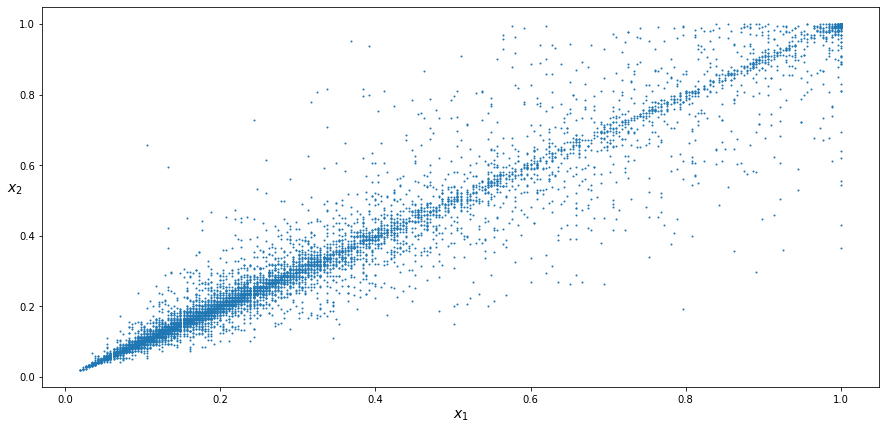

In [77]:
plt.figure(figsize=(15, 7))
plot_clusters(x)
plt.show()

Secondly, we set the number clusters to 2 and check the accuracy for each class.

In [177]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
kmeans.fit(x)
kmeans.inertia_

575942.8111518625

In [220]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans2.fit(x)
y2 = kmeans2.fit_predict(x)

kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=10,algorithm="full", max_iter=300, random_state=1)
kmeans3.fit(x)
y3 = kmeans3.fit_predict(x)

kmeans4 = KMeans(n_clusters=4, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans4.fit(x)
y4 = kmeans4.fit_predict(x)

kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans5.fit(x)
y5 = kmeans5.fit_predict(x)

kmeans6 = KMeans(n_clusters=6, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans6.fit(x)
y6 = kmeans6.fit_predict(x)

kmeans7 = KMeans(n_clusters=7, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans7.fit(x)
y7 = kmeans7.fit_predict(x)

kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans8.fit(x)
y8 = kmeans8.fit_predict(x)

kmeans9 = KMeans(n_clusters=9, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans9.fit(x)
y9 = kmeans9.fit_predict(x)

kmeans10 = KMeans(n_clusters=10, init='k-means++', n_init=10, algorithm="full", max_iter=300, random_state=1)
kmeans10.fit(x)
y10 = kmeans10.fit_predict(x)

print("The inertia of 2 Clusters: ", kmeans2.inertia_)
print("The inertia of 3 Clusters: ", kmeans3.inertia_)
print("The inertia of 4 Clusters: ", kmeans4.inertia_)
print("The inertia of 5 Clusters: ", kmeans5.inertia_)
print("The inertia of 6 Clusters: ", kmeans6.inertia_)
print("The inertia of 7 Clusters: ", kmeans7.inertia_)
print("The inertia of 8 Clusters: ", kmeans8.inertia_)
print("The inertia of 9 Clusters: ", kmeans9.inertia_)
print("The inertia of 10 Clusters: ", kmeans10.inertia_)

The inertia of 2 Clusters:  1007270.8411086297
The inertia of 3 Clusters:  837330.6798375535
The inertia of 4 Clusters:  758419.791811627
The inertia of 5 Clusters:  692130.6756020384
The inertia of 6 Clusters:  657076.8630580138
The inertia of 7 Clusters:  628412.5535844304
The inertia of 8 Clusters:  604620.6086386055
The inertia of 9 Clusters:  589668.8177792201
The inertia of 10 Clusters:  575942.8111518625


In [221]:
from sklearn import metrics

print("Accuracy for 2 Clusters:",metrics.accuracy_score(y, y2)*100,'%')
print("Accuracy for 3 Clusters:",metrics.accuracy_score(y, y3)*100,'%')
print("Accuracy for 4 Clusters:",metrics.accuracy_score(y, y4)*100,'%')
print("Accuracy for 5 Clusters:",metrics.accuracy_score(y, y5)*100,'%')
print("Accuracy for 6 Clusters:",metrics.accuracy_score(y, y6)*100,'%')
print("Accuracy for 7 Clusters:",metrics.accuracy_score(y, y7)*100,'%')
print("Accuracy for 8 Clusters:",metrics.accuracy_score(y, y8)*100,'%')
print("Accuracy for 9 Clusters:",metrics.accuracy_score(y, y9)*100,'%')
print("Accuracy for 10 Clusters:",metrics.accuracy_score(y, y10)*100,'%')
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy for 2 Clusters: 11.547987616099071 %
Accuracy for 3 Clusters: 18.04953560371517 %
Accuracy for 4 Clusters: 19.53560371517028 %
Accuracy for 5 Clusters: 16.52218782249742 %
Accuracy for 6 Clusters: 12.425180598555212 %
Accuracy for 7 Clusters: 12.1671826625387 %
Accuracy for 8 Clusters: 9.989680082559339 %
Accuracy for 9 Clusters: 10.732714138286893 %
Accuracy for 10 Clusters: 8.978328173374612 %


Now we will try the Elbow method in finding the best number of clusters to give the highest accuracy.

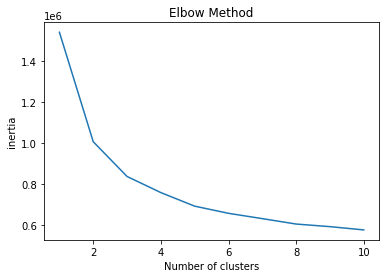

In [181]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=1)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()
#https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

From the figure above, the data are best to be clustered in 5 clusters.

Now let's try to change n_clusters and calculate the accuracy at each trial.

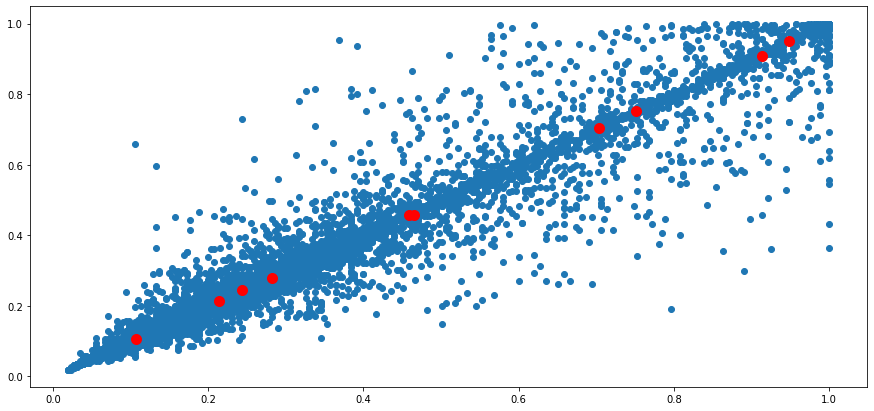

In [226]:
kmeans = KMeans(n_clusters=10
                , init='k-means++', max_iter=300, n_init=1, random_state=1)
pred_y = kmeans.fit_predict(x)
plt.figure(figsize=(15, 7))
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()
#https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [88]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y, pred_y)*100,'%')
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Accuracy: 26.006191950464398 %


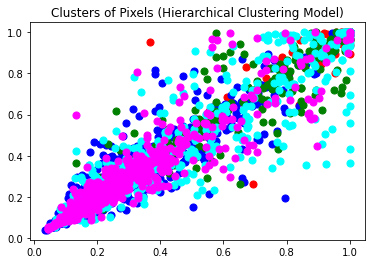

In [222]:
plt.scatter(x[pred_y==0, 0], x[pred_y==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(x[pred_y==1, 0], x[pred_y==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(x[pred_y==2, 0], x[pred_y==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(x[pred_y==3, 0], x[pred_y==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(x[pred_y==4, 0], x[pred_y==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.title('Clusters of Pixels (Hierarchical Clustering Model)')
plt.show()

b) Hierarchical Clustering algorithm:

In [200]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(data_new_5_array)

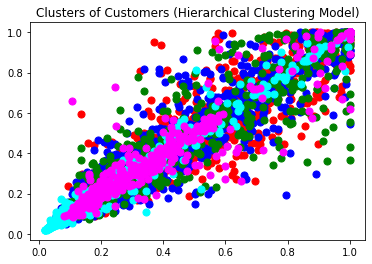

In [216]:
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(x[y_pred==3, 0], x[y_pred==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.show()

In [98]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y, y_pred)*100,'%')

ValueError: Found input variables with inconsistent numbers of samples: [9690, 2423]

In [123]:
def get_pred(i):
    y = pd.read_csv("/Users/mohammedkhedr/Downloads/y_train_smpl_"+str(i)+".csv")
    y_array = y.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_array,y_array, random_state=42)
    return y_test

In [124]:
yy_pred = np.stack([get_pred(i) for i in range(10)],axis=1, out=None)

In [125]:
pred_y = np.reshape(yy_pred, (yy_pred.shape[0],yy_pred.shape[1]))

In [126]:
pred_y.shape

(2423, 10)

In [138]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [139]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
m = model.fit(x=x_train,y=y_train,epochs=100)

Epoch 1/100
228/228 [==============================] - 0s 2ms/step - loss: 1.5991 - accuracy: 0.4267
Epoch 2/100
228/228 [==============================] - 0s 999us/step - loss: 1.1376 - accuracy: 0.6163
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 0.9382 - accuracy: 0.6989
Epoch 4/100
228/228 [==============================] - 0s 1ms/step - loss: 0.7530 - accuracy: 0.7765
Epoch 5/100
228/228 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.8268
Epoch 6/100
228/228 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.8478
Epoch 7/100
228/228 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8752
Epoch 8/100
228/228 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8779
Epoch 9/100
228/228 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.9012
Epoch 10/100
228/228 [==============================] - 0s 1ms/step - loss: 0.3944 - accu

In [141]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc*100)


Test accuracy: 93.6855137348175


In [142]:
yhat_classes = model.predict_classes(x_test, verbose=0)
yhat = np.reshape(yhat_classes, (y_test.shape[0],y_test.shape[1]))

In [143]:
y_pred = model.predict(x_test, verbose=0)

In [144]:
y_score = model.predict(x_test, verbose=0)

In [145]:
yhat_prop = model.predict_proba(x_test)

In [146]:
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5',
                'class 6', 'class 7', 'class 8', 'class 9']

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
cm = confusion_matrix(y_test, yhat)
print(cm)
print(classification_report(y_test, yhat, target_names=target_names))
print(roc_auc_score(y_test, y_pred, average='weighted',multi_class='ovr'))

Accuracy: 0.936855
[[ 56   4   0   0   0   0   0   0   0   0]
 [ 12 537   4   1   3   0   0   0   4   1]
 [  1  38 513   7   7   0   0   0   3   0]
 [  0   2   2 356   1   0   0   0   1   0]
 [  3   5   1   0 476   0   0   0   0   1]
 [  0   0   0   0   0  42   0   0  14   1]
 [  0   0   1   4   3   0  65   0  12   0]
 [  0   0   0   1   0   0   0  48   5   0]
 [  1   1   0   0   0   0   0   0 120   0]
 [  1   1   0   0   0   0   0   0   7  57]]
              precision    recall  f1-score   support

     class 0       0.76      0.93      0.84        60
     class 1       0.91      0.96      0.93       562
     class 2       0.98      0.90      0.94       569
     class 3       0.96      0.98      0.97       362
     class 4       0.97      0.98      0.98       486
     class 5       1.00      0.74      0.85        57
     class 6       1.00      0.76      0.87        85
     class 7       1.00      0.89      0.94        54
     class 8       0.72      0.98      0.83       122
     clas

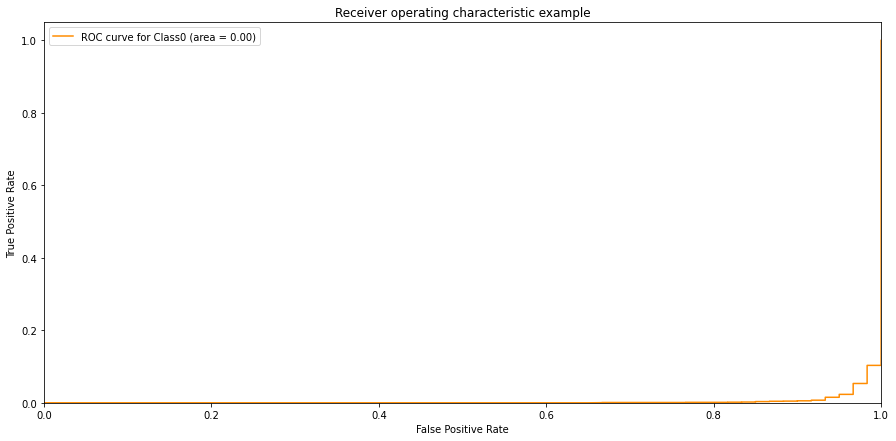

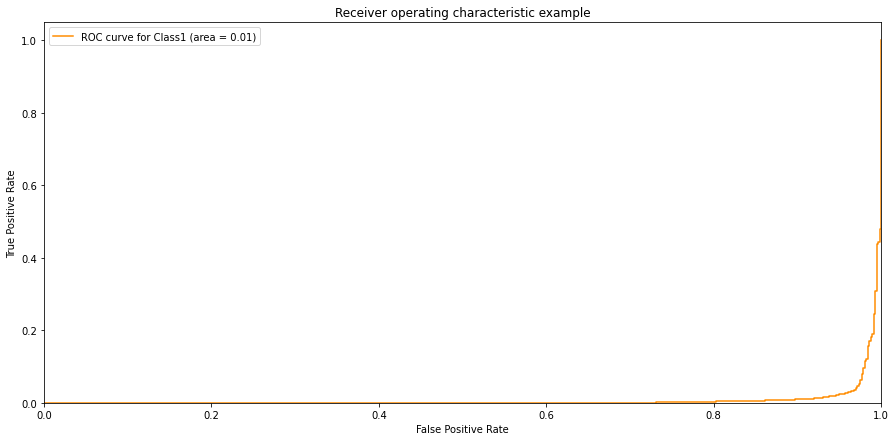

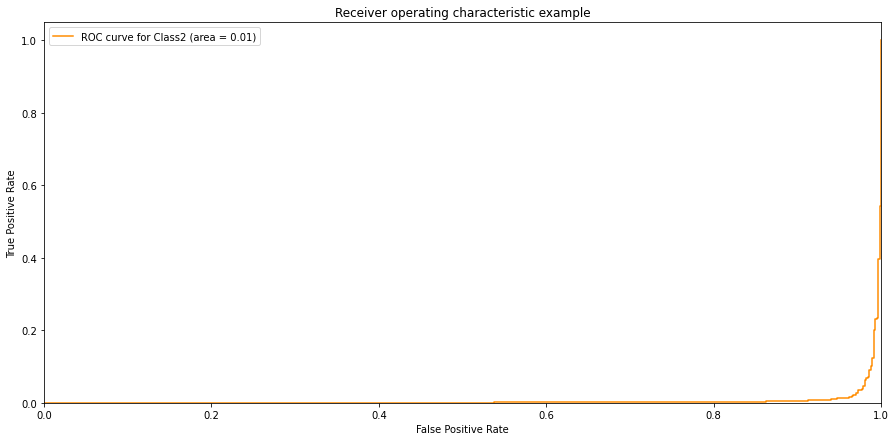

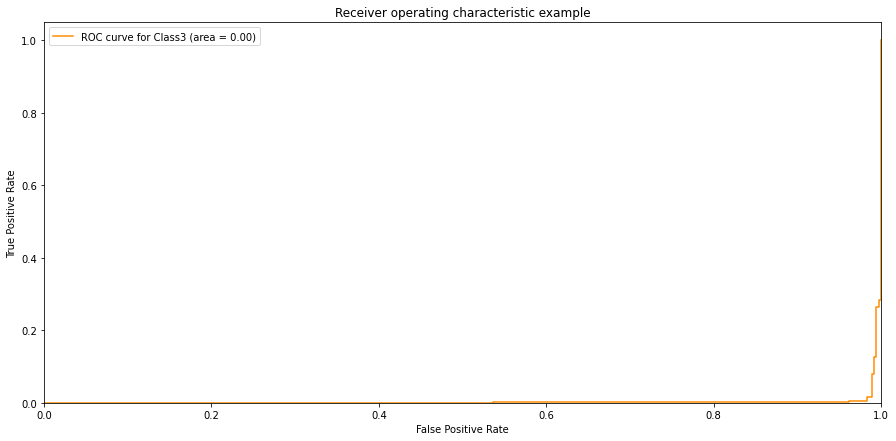

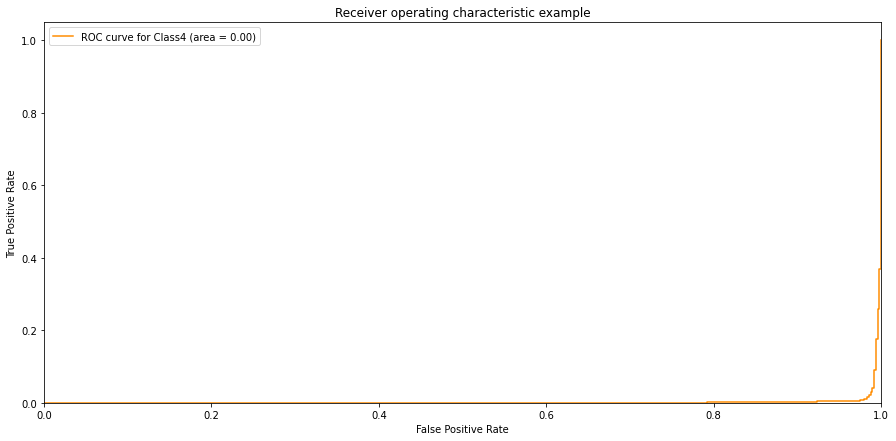

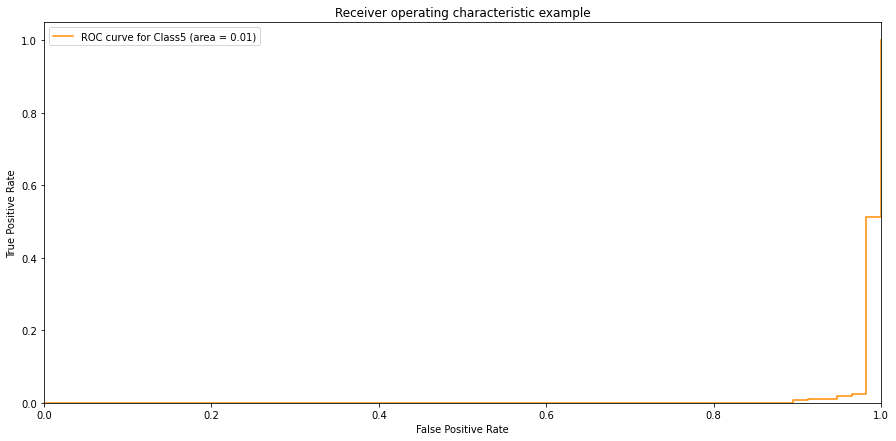

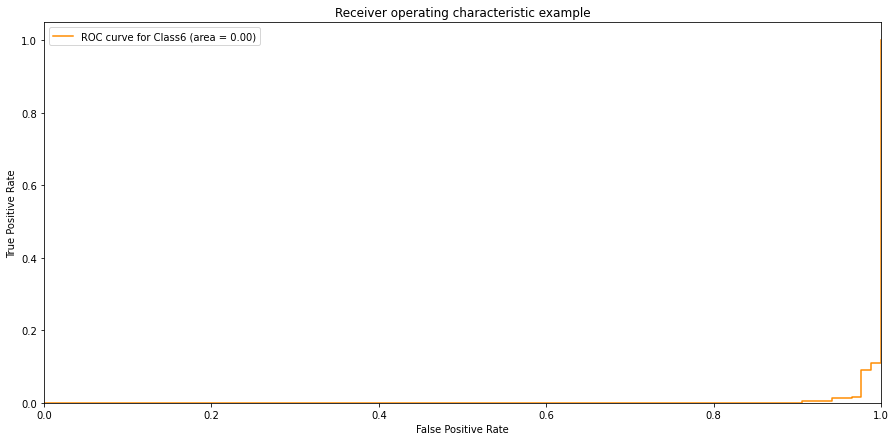

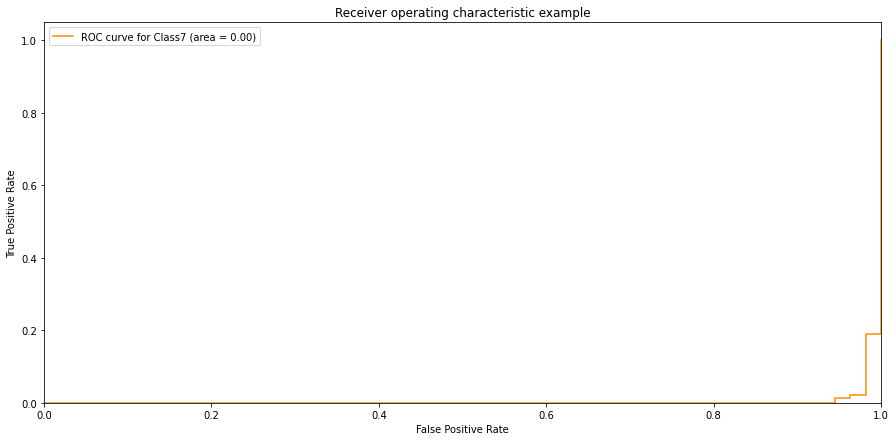

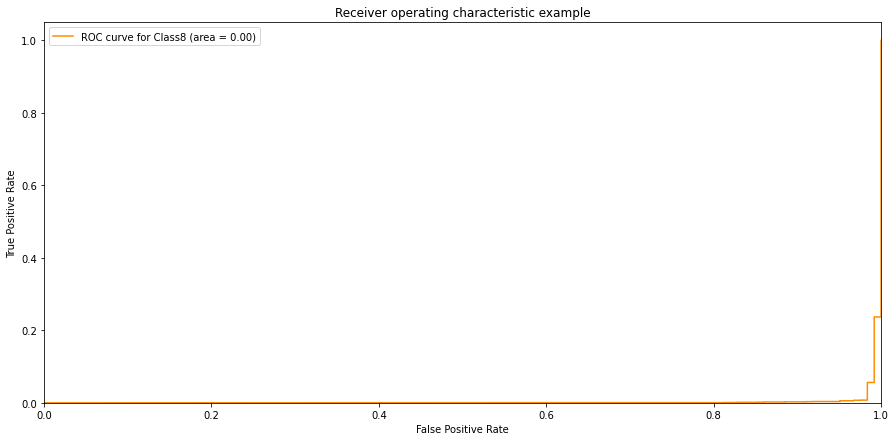

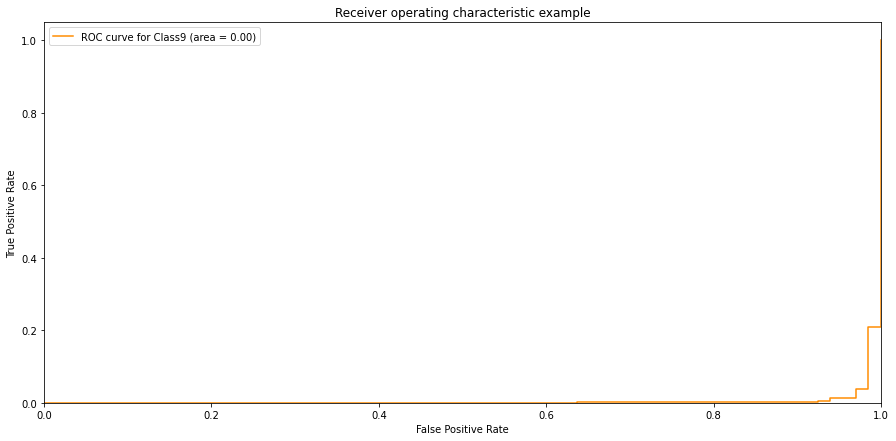

In [151]:
from sklearn.metrics import roc_curve, auc
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(pred_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(pred_y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
for i in range(n_classes):
    plt.figure(figsize=(15, 7))
    plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve for Class'+str(i)+' (area = %0.2f)' % roc_auc[i])
    #plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="upper left")
    plt.show()